Carlos Bravo Garrán - 100474964

 # __Exploratory Data Analysis (EDA)__ 

 In this notebook, a simplified Exploratory Data Analysis (EDA) will be performed on the provided dataset, with the objective of analyzing and understanding the factors that influence employee attrition in an organization.

### 1. __Load Libraries and Data__


In [79]:
# Data analysis and wrangling
import numpy as np
import pandas as pd
import time

# Graphs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Machine learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, recall_score, roc_curve, auc, confusion_matrix, classification_report)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier


# Warnings configuration
import warnings
warnings.filterwarnings('ignore')

Create virtual environment and install dependencies

In [80]:
# Install venv and requirements
# !python3 -m venv venv
# !source venv/bin/activate
# %pip install -r ../requirements.txt

Load the dataset from the CSV file


In [81]:
df = pd.read_csv("../data/attrition_availabledata_03.csv")

### 2. __Initial Exploration__

Review the general structure of the dataset


In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2925 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2919 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

In [83]:
dataset_shape = df.shape
print(f"The dataset contains {dataset_shape[0]} rows and {dataset_shape[1]} columns.")

The dataset contains 2940 rows and 31 columns.


In [84]:
df.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2925.000000,2928.000000,2919.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2927.000000,2940.000000,2940.0,2940.000000,2934.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.326447,12.701701,2.740476,3.160884,2.726496,2.715847,2.756423,36.782653,9.287755,2.902721,...,65115.350340,2.664161,15.260544,8.0,0.789796,11.262440,2.812925,6.988095,2.192517,4.127891
std,1.334478,5.518054,0.718440,0.367487,1.093007,1.099055,0.717885,9.157614,8.157695,1.030032,...,47196.796005,2.495031,3.706960,0.0,0.843302,7.787843,1.287138,5.994740,3.220122,3.540747
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285664,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,28860.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,7.029037,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.000000,7.000000,3.000000,...,48980.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.907145,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,83920.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [85]:
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,6.466932,14,3,4,3.0,3.0,3.0,34,Non-Travel,Research & Development,...,Y,20,8,1,6.0,3,3,1,2,No
1,6.976151,19,3,3,3.0,1.0,3.0,28,Travel_Rarely,Sales,...,Y,15,8,0,3.0,6,3,1,2,No
2,6.076227,13,2,3,4.0,3.0,3.0,24,Travel_Rarely,Sales,...,Y,12,8,0,1.0,2,1,0,0,Yes
3,7.426888,5,2,3,3.0,2.0,3.0,38,Travel_Rarely,Research & Development,...,Y,19,8,1,7.0,3,5,1,4,Yes
4,5.783249,14,2,3,3.0,4.0,3.0,26,Travel_Rarely,Sales,...,Y,12,8,0,5.0,2,5,1,2,No


In [86]:
df[['Attrition']].head()

,Attrition
0,No
1,No
2,Yes
3,Yes
4,No


This is a __classification__ problem, as the target variable (Attrition) is binary (Yes / No). This means that the model must predict whether an employee will leave the company or not, rather than predicting a numerical value.

### 3. __Identify Categorical and Numerical Variables__

In [87]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Categorical variables:", categorical_columns)
print("Numerical variables:", numerical_columns)

Categorical variables: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Numerical variables: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### 3.1 Reclassify variables by adding ordinals

In [88]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_columns = ["Education", "JobLevel", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "PerformanceRating", "StockOptionLevel"]
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Remove from numerical the ones we have classified as ordinal
numerical_columns = [col for col in numerical_columns if col not in ordinal_columns]

print("Categorical variables:", categorical_columns)
print("Ordinal variables:", ordinal_columns)
print("Numerical variables:", numerical_columns)


Categorical variables: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Ordinal variables: ['Education', 'JobLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'StockOptionLevel']
Numerical variables: ['hrs', 'absences', 'JobInvolvement', 'Age', 'DistanceFromHome', 'EmployeeCount', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### 3.2 Detect high cardinality categorical variables

Identify categorical variables that may generate too many columns when encoding them


In [89]:
categorical_cardinality = df[categorical_columns].nunique().sort_values(ascending=False)
display(categorical_cardinality)


JobRole           9
EducationField    6
Department        3
BusinessTravel    3
MaritalStatus     3
Gender            2
Attrition         2
Over18            1
dtype: int64

It is not considered that there are high cardinality categorical variables, therefore no additional grouping or different encoding will be needed.

### 4. __Analysis of the Target Variable__

Review the distribution of the target variable to identify class imbalance

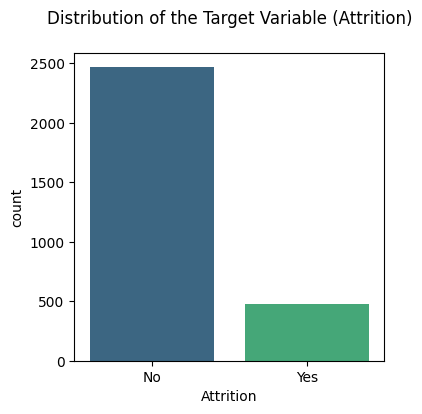

,proportion
0,83.877551
1,16.122449


In [90]:
if "Attrition" in df.columns:
    plt.figure(figsize=(4,4))
    sns.countplot(x=df["Attrition"], palette="viridis")
    plt.title("Distribution of the Target Variable (Attrition)\n")
    plt.show()
    
    attrition_counts = df["Attrition"].value_counts(normalize=True)
    display(pd.DataFrame(attrition_counts).rename(columns={"Attrition": "Proportion"}).reset_index(drop=True)*100)


In [91]:
df.Attrition.value_counts().sort_index().to_frame()

,count
Attrition,
No,2466
Yes,474


The dataset is imbalanced, with 2466 employees not leaving the company (NO) and 474 who do leave (YES).

This means that the majority of employees do not leave the company, which could cause a poorly trained model to always predict "No", achieving an apparently high accuracy, but without actually capturing the cases of attrition.


### 5. __Identify Missing Values__

In [92]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].to_frame().reset_index()
missing_values.columns = ["Column Name", "Missing Values"]

display(missing_values)

,Column Name,Missing Values
0,EnvironmentSatisfaction,15
1,JobSatisfaction,12
2,WorkLifeBalance,21
3,NumCompaniesWorked,13
4,TotalWorkingYears,6


Since the missing values are very few compared to the total number of data, we will take the following measures:
- Impute missing values in numerical variables with the median
- Impute missing values in categorical variables with the mode

In [93]:
# Columns differentiated by type
num_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in ordinal_columns]
ord_cols = ordinal_columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

### 6. __Identify Constant and Identifying Variables__

#### 6.1 Check for columns with unique values

In [94]:
unique_values = df.nunique()

constant_columns = df.nunique()[df.nunique() == 1].to_frame().reset_index()
constant_columns.columns = ["Column Name", "Unique Value Count"]
constant_columns["Unique Value"] = constant_columns["Column Name"].apply(lambda col: df[col].unique()[0])
constant_columns_list = constant_columns["Column Name"].tolist()

display(constant_columns)

,Column Name,Unique Value Count,Unique Value
0,EmployeeCount,1,1
1,Over18,1,Y
2,StandardHours,1,8


#### 6.2 Check for columns with ID variables

In [95]:
print(f"Total number of rows: {len(df)}")

unique_values = df.nunique()
print("Number of unique values per column:")
print(unique_values, "\n")

id_columns = [col for col in df.columns if df[col].nunique() == len(df)]
print("Identifying columns detected:", id_columns)

Total number of rows: 2940
Number of unique values per column:
hrs                        2939
absences                     24
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
Age                          43
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 2940
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1304
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWith

As its name indicates, _EmployeeID_ is an identifying variable, making it redundant for the study.

On the other hand, the _hours_ column has 2939 values, 1 less than the total number of rows. It might be considered identifying, but upon checking the values, we see that they are simply different decimal values.

#### 6.3 Remove Constant and Identifying Columns

In [96]:
df = df.drop(columns=constant_columns_list + id_columns, errors='ignore')
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print('The following columns have been removed:', constant_columns_list + id_columns)


The following columns have been removed: ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']


### 7. __Create Correlation Matrix__

Generate the correlation matrix to understand relationships between numerical variables, having already removed constant and identifying variables.

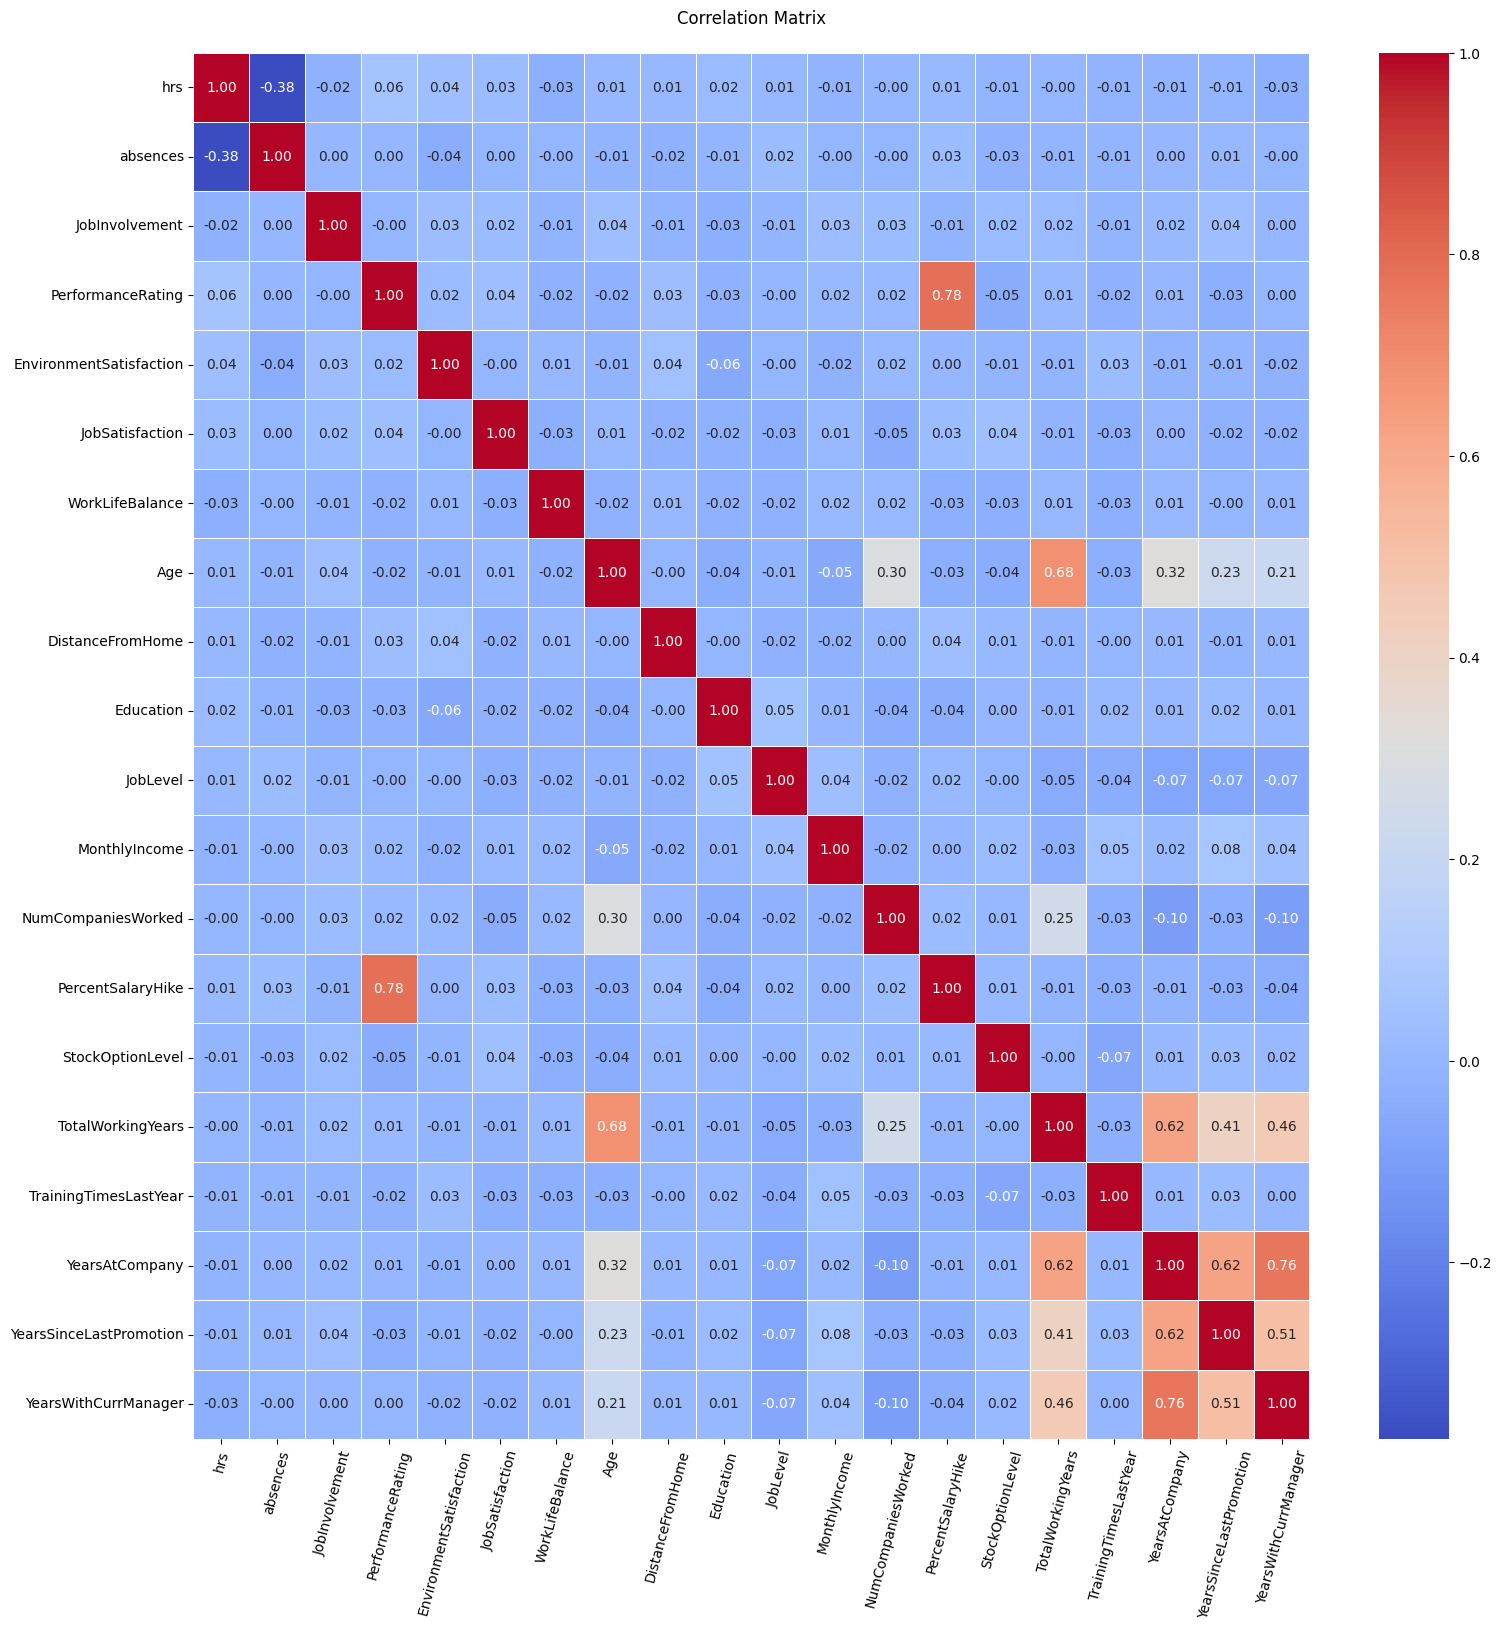

In [97]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm")
plt.xticks(rotation=75)
plt.title("Correlation Matrix\n")
plt.show()


There are no extremely high correlations, close to 1 or -1, so the variables are not redundant nor strongly dependent on each other. However, there are some moderate correlations that we can consider.

__Relationship between tenure and work experience:__

- _YearsAtCompany_ and _YearsWithCurrManager_ (0.76): Employees who have been with the company longer are more likely to have been with the same manager for a longer time.
- _YearsAtCompany_ and _TotalWorkingYears_ (0.62): The longer a person has worked in general, the more time they may have spent at the current company.

__Relationship between _PercentSalaryHike_ and _PerformanceRating_ (0.78):__ There is a high correlation between salary increase and performance rating. Employees with better performance receive higher salary increases.

- It could be evaluated if _PercentSalaryHike_ is redundant, as it is strongly linked to _PerformanceRating_.


Regarding the rest, they have very low correlations with all the others, indicating that they may be independent or influenced by other factors not considered. Thus, it could be reviewed if these variables have any significant impact on the target variable, or if they can be eliminated.


### 8. __Identify Correlation with the Target Variable__

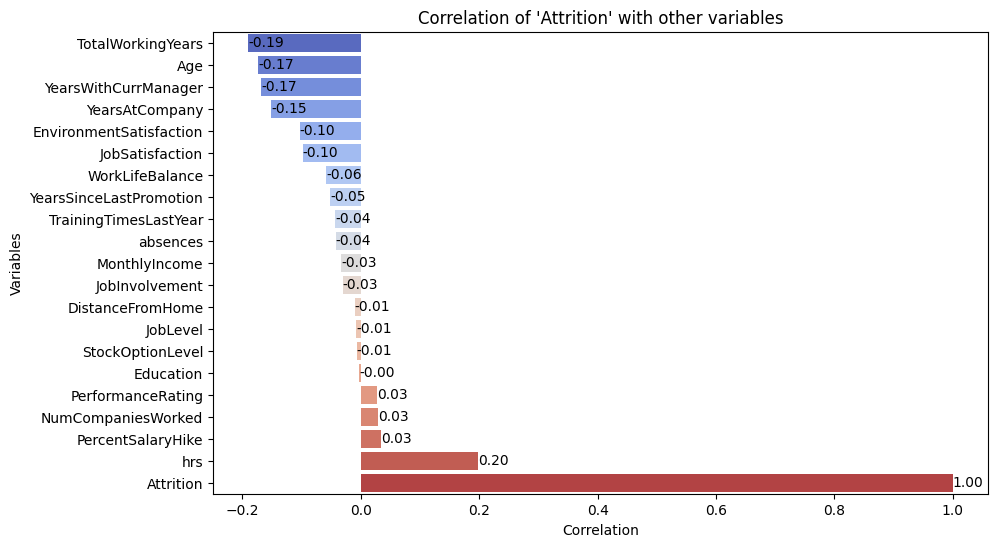

In [98]:
# Convert the target variable to numeric
df_aux = df.copy()
df_aux["Attrition"] = df_aux["Attrition"].map({"Yes": 1, "No": 0})

# Ensure we only work with numeric columns
df_corr = df_aux.select_dtypes(include=['number'])
attrition_correlation = df_corr.corr()["Attrition"].sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=attrition_correlation.index, x=attrition_correlation.values, palette="coolwarm")

# Add values on the bars
for index, value in enumerate(attrition_correlation.values):
    ax.text(value, index, f"{value:.2f}", ha="left", va="center", fontsize=10, color="black")

plt.title("Correlation of 'Attrition' with other variables")
plt.xlabel("Correlation")
plt.ylabel("Variables")
plt.show()


Se puede comprobar que no hay una variable con una correlación extremadamente fuerte con Attrition, pero sí que muchas de ellas tienen una relación muy baja, por ello cabría la posibilidad de considerar su elimiación con el fin de simplificar el modelo.

Junto con las horas trabajadas, las variables de antigüedad (_YearsAtCompany_, _TotalWorkingYears_) son las que más influyen en la retención, se pueden evaluar las relaciones con _YearsWithCurrManager_ para comprobar si esta última sería redundante.

- Se podrían eliminar las variables que tienen muy baja correlación con la objetivo.

In [99]:
# Filter variables with correlation less than 0.05 in absolute value
low_corr_columns = attrition_correlation[abs(attrition_correlation) < 0.05].index.tolist()

# Remove these columns from the dataset
df_filtered = df.drop(columns=low_corr_columns, errors='ignore')

print(f"The following columns have been removed in a test dataframe due to low correlation: {low_corr_columns}")


The following columns have been removed in a test dataframe due to low correlation: ['TrainingTimesLastYear', 'absences', 'MonthlyIncome', 'JobInvolvement', 'DistanceFromHome', 'JobLevel', 'StockOptionLevel', 'Education', 'PerformanceRating', 'NumCompaniesWorked', 'PercentSalaryHike']


### __9. Visualize Relationships Between Correlated Variables__
Perform a visual exploration of the relationships between highly correlated variables to help decide if there are redundancies or if some variables need to be transformed before using them in a predictive model.

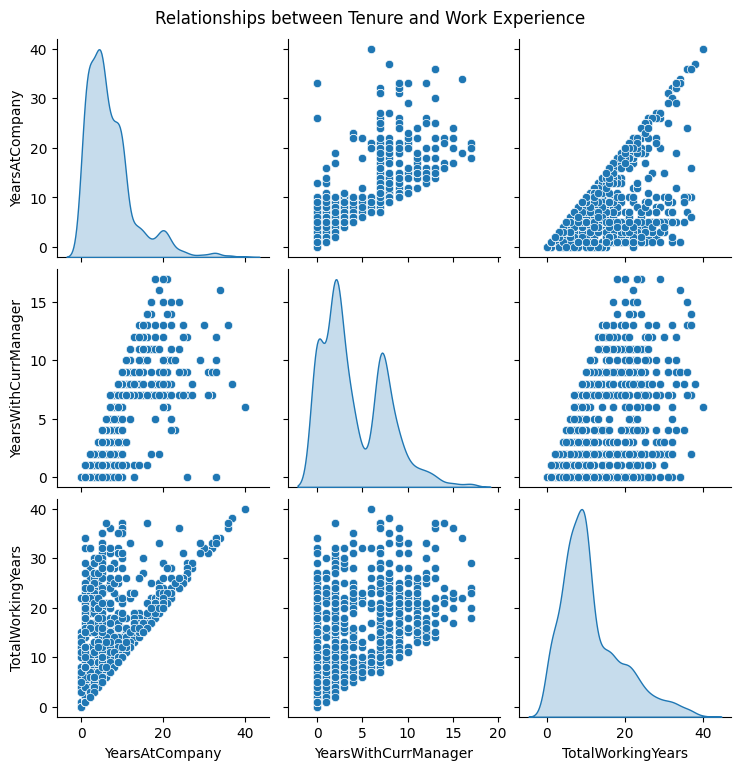

In [100]:
# Visualize relationships between tenure variables with pairplot
sns.pairplot(df, vars=["YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears"], diag_kind="kde")
plt.suptitle("Relationships between Tenure and Work Experience", y=1.02)
plt.show()


__Relationship between Tenure and Work Experience__

- _YearsAtCompany_ and _YearsWithCurrManager_ (0.76): Strong relationship, possible redundancy.
- _YearsAtCompany_ and _TotalWorkingYears_ (0.62): Expected relationship, but provides different information.
- Conclusion: _YearsAtCompany_ or _YearsWithCurrManager_ could be redundant.

It could be evaluated for impact on the model and one could be removed if necessary.


Having identified and evaluated the variables, checking for null values, constant and identifying values, and correlations between them, we can proceed to the evaluation of potential classification models.

## __Evaluation of Classification Models with Advanced Preprocessing__
In this section, a preprocessing and modeling pipeline is implemented to predict the Attrition variable in an employee dataset. Cross-validation will be used for internal evaluation (inner evaluation) and a final evaluation with an independent test set (outer evaluation).

The main steps followed are:

1. Splitting data into training and test sets (2/3 for training the model - 1/3 for evaluating final performance).
2. Data preprocessing, including imputation, scaling, encoding, and dimensionality reduction.
3. Internal evaluation (inner evaluation) using stratified cross-validation.
4. Training and final evaluation (outer evaluation) with key metrics such as balanced accuracy, accuracy, TPR, TNR, and confusion matrix.

### __1. Data Splitting into Train and Test__

The predictor variables (X) are separated from the target variable (y) and the data is split into training and test sets.Se separan las variables predictoras (X) de la variable objetivo (y) y realiza la división de los datos en conjuntos de entrenamiento y prueba

In [101]:
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=1/3, random_state=100474964)

### __2. Data Preprocessing__

The preprocessing steps for each variable type are as follows:

1. **_Ordinal Variables_**:  
    - Applied Label Encoding using _OrdinalEncoder_.
    - Missing values are imputed with the median using _SimpleImputer_.

2. **_Categorical Variables_**:  
    - Missing values are imputed with the most frequent value (_most_frequent_) using _SimpleImputer_.
    - Encoded with _OneHotEncoder_ to handle categorical data.
    - Dimensionality reduction is applied using _PCA_ with _n_components=5_.

3. **_Numerical Variables_**:  
    - Missing values are imputed with the median using _SimpleImputer_.
    - Scaled using _RobustScaler_ to handle outliers effectively.

A _ColumnTransformer_ is used to combine these preprocessing steps into a single pipeline for efficient application to the dataset.


#### 2.1 Identification of Variable Types


In [102]:
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
ordinal_columns = ["Education", "JobLevel", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "PerformanceRating", "StockOptionLevel"]


#### 2.2 Comparison Between Means and Medians


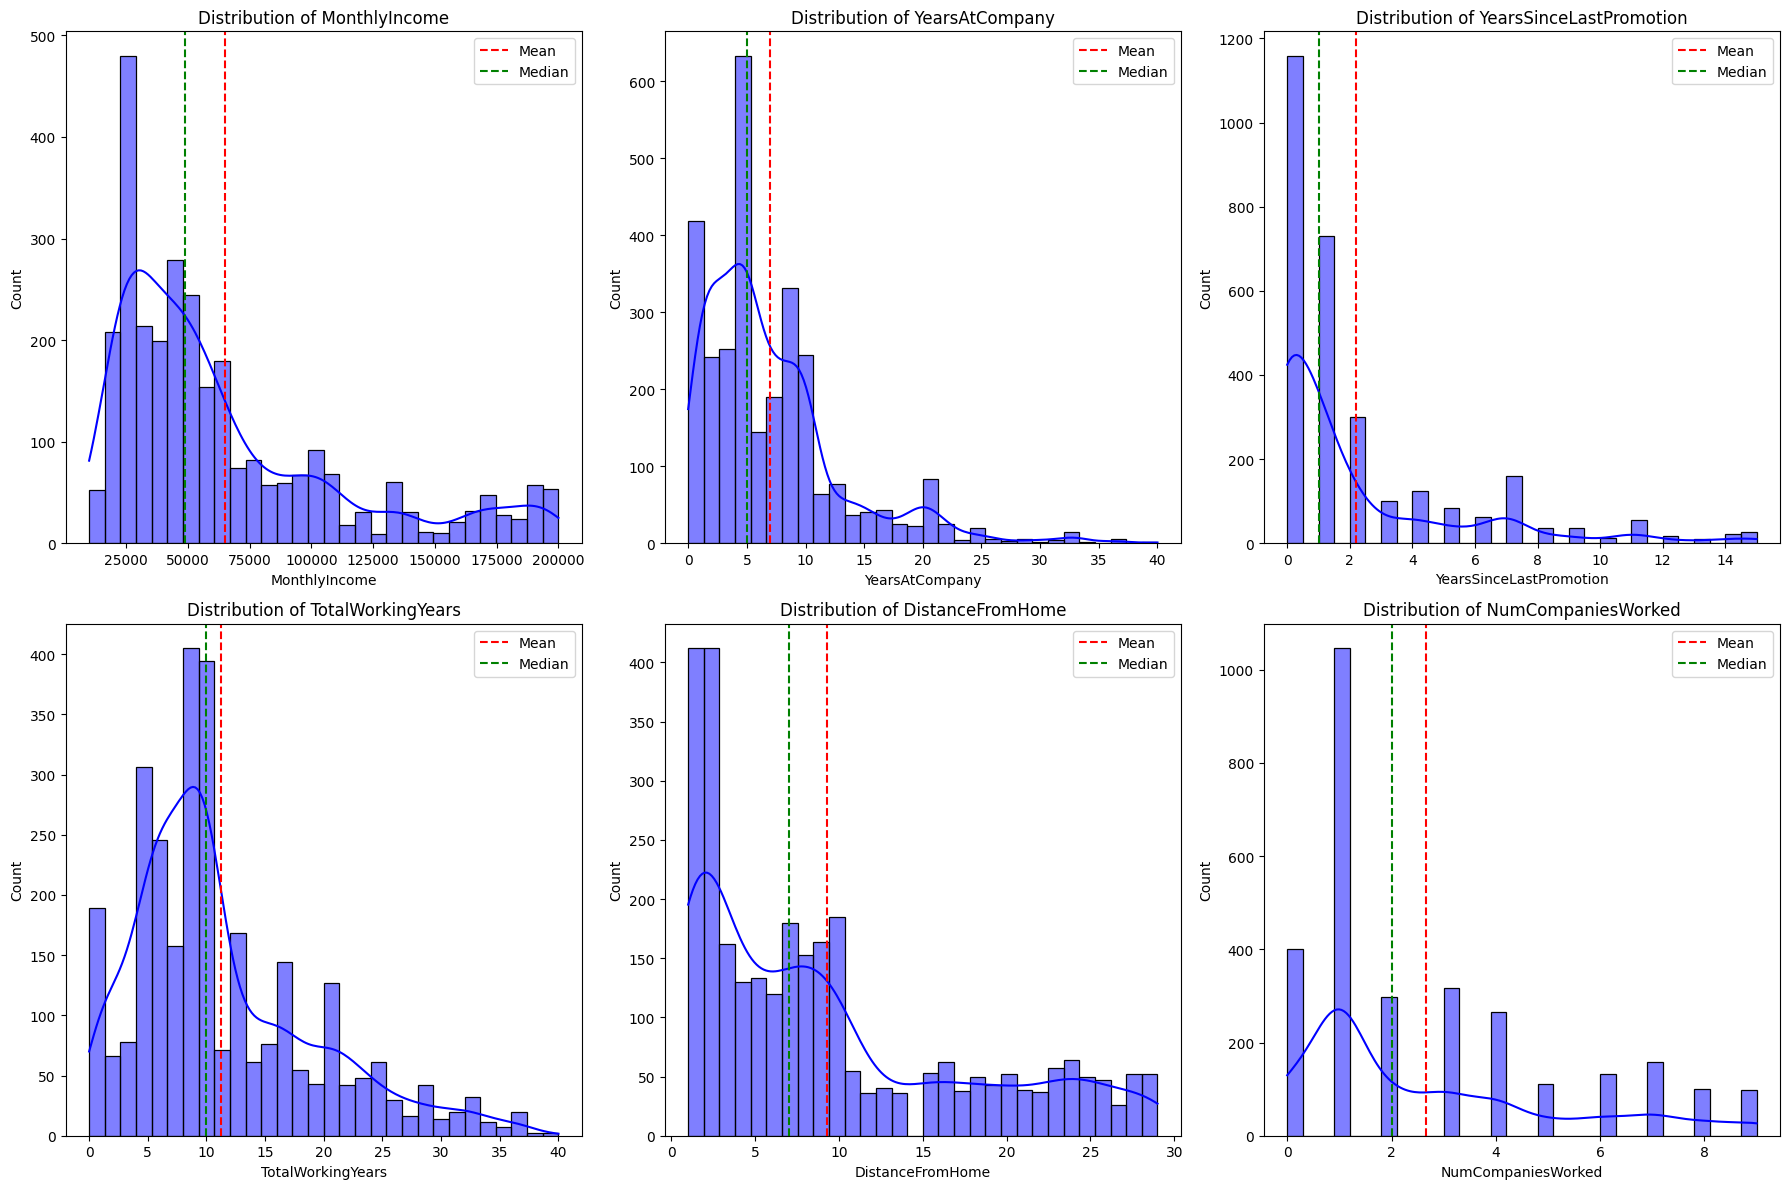

In [103]:
# Select columns with significant differences between mean and median
selected_columns = [
    "MonthlyIncome", "YearsAtCompany", "YearsSinceLastPromotion",
    "TotalWorkingYears", "DistanceFromHome", "NumCompaniesWorked"
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(selected_columns):
    sns.histplot(df[col], kde=True, bins=30, color='blue', ax=axes[i]) 
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].legend()

plt.tight_layout()
plt.show()

1. **Significant Differences Between Mean and Median**: Variables such as _MonthlyIncome_, _YearsAtCompany_, and _YearsSinceLastPromotion_ show notable differences between their means and medians, indicating skewed distributions or outliers.  
2. **Skewed Distributions**: Positive skew in variables like _MonthlyIncome_ and _YearsAtCompany_ suggests that means are influenced by extreme values, while medians are more robust.  
3. **Robustness of the Median**: In skewed distributions, the median is less sensitive to outliers, making it more suitable for describing the center of the data and imputing missing values.  

Given that many variables show significant differences between mean and median, along with skewed distributions, it is concluded that the __median__ is a more robust and representative strategy for imputing missing data.


#### 2.3 Transformations by Variable Type

In [104]:
# Apply Label Encoding to ordinal variables
ord_encoder = OrdinalEncoder()
df[ordinal_columns] = ord_encoder.fit_transform(df[ordinal_columns])

ord_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Pipeline for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))
])

# Pipeline for numerical data (imputation with median)
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# ColumnTransformer with all preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_columns),
    ('cat', cat_transformer, categorical_columns),
    ('ord', ord_transformer, ordinal_columns)
])

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['hrs', 'absences', 'JobInvolvement',
                                  'PerformanceRating',
                                  'EnvironmentSatisfaction', 'JobSatisfaction',
                                  'WorkLifeBalance', 'Age', 'DistanceFromHome',
                                  'Education', 'JobLevel', 'MonthlyIncome',
                                  'NumCompaniesWorked', 'PercentSalaryHike',...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('pca', PCA(n_components=5))]),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Education', 'JobLevel',
                                  'EnvironmentSatisfaction', 'JobSatisfaction',
                                  'WorkLifeBalance', 'PerformanceRating',
                                  'StockOptionLevel'])])

#### __2.4 Evaluation of Models with SMOTE__

In this section, tests are conducted by applying **SMOTE (Synthetic Minority Over-sampling Technique)** to evaluate its impact on the performance of classification models.

SMOTE allows balancing the class distribution, reducing the model's bias toward the majority class.


In [105]:
from imblearn.over_sampling import SMOTE
# Apply the preprocessing pipeline to X_train
X_train_transformed = preprocessor.fit_transform(X_train)

# Apply SMOTE to the transformed data
smote = SMOTE(random_state=100474964)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

print(f"Distribution after applying SMOTE:\n{pd.Series(y_train_resampled).value_counts()}")

Distribution after applying SMOTE:
Attrition
Yes    1644
No     1644
Name: count, dtype: int64


After applying SMOTE, it has been observed that the results show a slight improvement in performance metrics, especially in the True Positive Rate (TPR), indicating that the models are more effective in detecting the minority class.

Additionally, the computational cost of applying SMOTE has been low, making it a viable technique to improve class balance without significantly affecting training and inference efficiency.

### __3. Conversion of Target Variable (Attrition)__
Convert the Attrition variable to a binary format (1 for "Yes" and 0 for "No")

In [106]:
y_train = y_train.map({"Yes": 1, "No": 0})
y_test = y_test.map({"Yes": 1, "No": 0})


### __4. Application of the Preprocessor__
The preprocessor is fitted and transforms the training and test data

In [107]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [108]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a classification model and displays key metrics, confusion matrix, and ROC curve.
    """
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    tpr = recall_score(y_test, y_pred)  # Sensitivity / TPR
    tnr = recall_score(y_test, y_pred, pos_label=0)  # Specificity / TNR
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"=== Final Evaluation: {model_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"TPR (Sensitivity): {tpr:.4f}")
    print(f"TNR (Specificity): {tnr:.4f}")
    print("\nConfusion Matrix:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

    if y_prob is not None:
        fpr, tpr_curve, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr_curve)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr_curve, label=f'{model_name} (AUC = {auc_score:.4f})', color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
        
        plt.xlabel("False Positive Rate (FPR)")
        plt.ylabel("True Positive Rate (TPR)")
        plt.title(f"ROC Curve for {model_name}")
        plt.legend()
        plt.grid()
        plt.show()
    
        return {"Accuracy": acc, "Balanced Accuracy": bal_acc, "TPR": tpr, "TNR": tnr, "AUC": auc_score}
    
    return {"Accuracy": acc, "Balanced Accuracy": bal_acc, "TPR": tpr, "TNR": tnr, "AUC": None}

### __5. Evaluation with Dummy Model__

A Dummy model is trained to establish reference points:

- Expected Balanced Accuracy if the model were trivial.
- Comparison with trained models to demonstrate their effectiveness.

This will verify if the models are truly learning patterns or simply reflecting class distribution.

=== Final Evaluation: Dummy Model ===
Accuracy: 0.8388
Balanced Accuracy: 0.5000
TPR (Sensitivity): 0.0000
TNR (Specificity): 1.0000

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       822
           1       0.00      0.00      0.00       158

    accuracy                           0.84       980
   macro avg       0.42      0.50      0.46       980
weighted avg       0.70      0.84      0.77       980



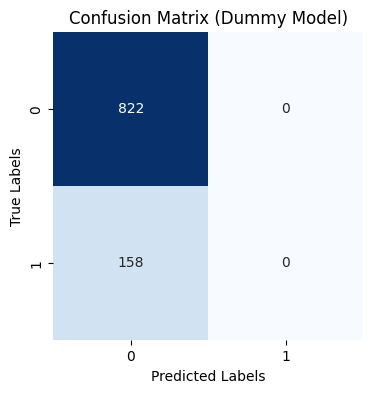

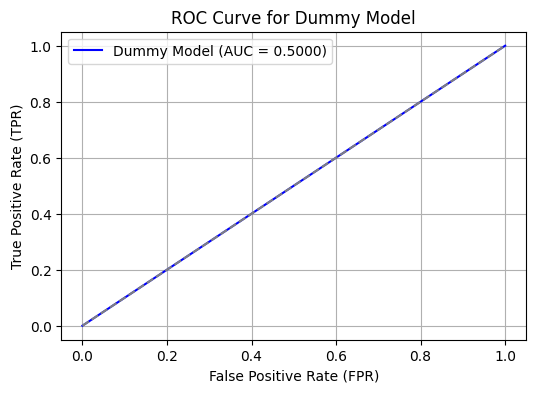

In [109]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_transformed, y_train)
dummy_ev = evaluate_model(dummy, X_test_transformed, y_test, "Dummy Model")


### __6. Definition of Models with Pipeline__
A pipeline is built that includes preprocessing and the classification model (_DecisionTreeClassifier_ and _KNeighborsClassifier_).

In [110]:
clf_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', tree.DecisionTreeClassifier(class_weight='balanced'))
])

clf_tree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['hrs', 'absences',
                                                   'JobInvolvement',
                                                   'PerformanceRating',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance', 'Age',
                                                   'DistanceFromHome',
                                                   'Education', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'NumCompa...
                                                                   PCA(n_components=5))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole',
                                                   'MaritalStatus']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Education', 'JobLevel',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance',
                                                   'PerformanceRating',
                                                   'StockOptionLevel'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced'))])

In [111]:
clf_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

clf_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['hrs', 'absences',
                                                   'JobInvolvement',
                                                   'PerformanceRating',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance', 'Age',
                                                   'DistanceFromHome',
                                                   'Education', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'NumCompa...
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole',
                                                   'MaritalStatus']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Education', 'JobLevel',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance',
                                                   'PerformanceRating',
                                                   'StockOptionLevel'])])),
                ('classifier', KNeighborsClassifier())])

### __7. Internal Evaluation (Inner Evaluation)__
For internal evaluation, stratified cross-validation (StratifiedKFold) with 5 splits (n_splits=5) is used.

In [112]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100474964)
cross_val_scores = cross_val_score(clf_tree, X_train, y_train, cv=skf, scoring='balanced_accuracy')
print(f"Balanced Accuracy (inner evaluation): {np.mean(cross_val_scores):.4f}")

Balanced Accuracy (inner evaluation): 0.7696


### __8. Model Train__
The model is fitted with the entire training set.

In [113]:
start_time = time.time()
clf_tree.fit(X_train, y_train)
end_time = time.time()
tree_time = end_time - start_time

start_time = time.time()
clf_knn.fit(X_train, y_train)
end_time = time.time()
knn_time = end_time - start_time

### __9. Evaluation with Test (Outer Evaluation)__
Predictions are made on the test set and the main metrics are calculated:

- Balanced Accuracy: Average of TPR and TNR.
- Accuracy: Proportion of correct predictions.
- TPR (Sensitivity/Recall): How well the model detects positive cases.
- TNR (Specificity): How well the model detects negative cases.
- Confusion Matrix: Detailed visualization of hits and errors.

=== Final Evaluation: Decision Tree (Base) ===
Accuracy: 0.9000
Balanced Accuracy: 0.8049
TPR (Sensitivity): 0.6646
TNR (Specificity): 0.9453

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       822
           1       0.70      0.66      0.68       158

    accuracy                           0.90       980
   macro avg       0.82      0.80      0.81       980
weighted avg       0.90      0.90      0.90       980



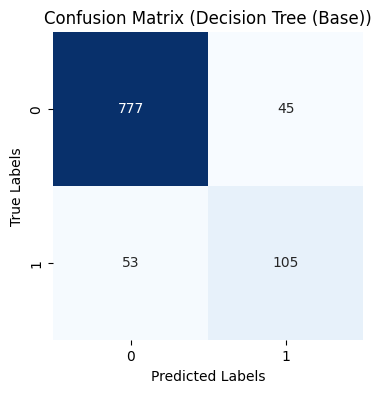

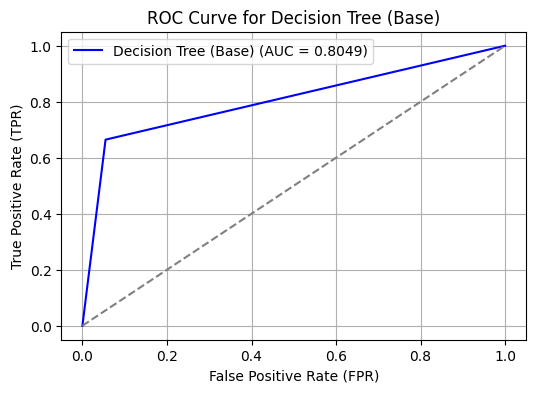

=== Final Evaluation: KNN (Base) ===
Accuracy: 0.8449
Balanced Accuracy: 0.6187
TPR (Sensitivity): 0.2848
TNR (Specificity): 0.9526

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       822
           1       0.54      0.28      0.37       158

    accuracy                           0.84       980
   macro avg       0.70      0.62      0.64       980
weighted avg       0.82      0.84      0.82       980



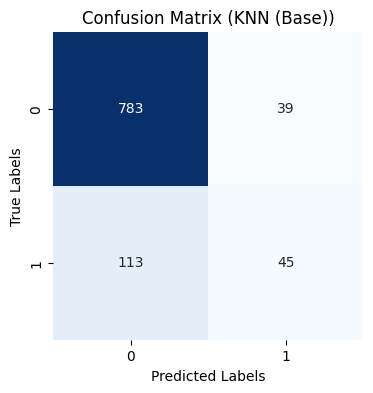

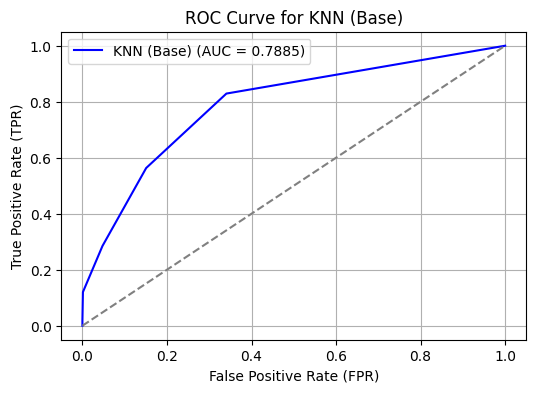

In [114]:
d_tree_ev = evaluate_model(clf_tree, X_test, y_test, "Decision Tree (Base)")
knn_ev = evaluate_model(clf_knn, X_test, y_test, "KNN (Base)")

### __10. Model Optimization with RandomizedSearchCV__

Randomized hyperparameter search (_RandomizedSearchCV_) is used to find the best configuration for the models to improve their performance by efficiently tuning their hyperparameters.

- KNN (_n_neighbors_, _weights_, _metric_).  
- Decision Tree (_max_depth_, _criterion_).


In [115]:
param_dist_knn = {
    "n_neighbors": randint(1, 20), 
    "weights": ["uniform", "distance"], 
    "metric": ["euclidean", "manhattan"]}

param_dist_tree = {
    "max_depth": randint(3, 20),
    "criterion": ["gini", "entropy"],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5)
}

random_knn = RandomizedSearchCV(KNeighborsClassifier(), 
                                param_distributions=param_dist_knn, 
                                n_iter=10, cv=5, 
                                scoring="balanced_accuracy", 
                                n_jobs=-1, random_state=100474964)

random_tree = RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_dist_tree, 
                                 n_iter=10, cv=5, 
                                 scoring="balanced_accuracy", 
                                 n_jobs=-1, random_state=100474964)

start_time = time.time()
random_knn.fit(X_train_transformed, y_train)
end_time = time.time()
knn_hpo_time = end_time - start_time

start_time = time.time()
random_tree.fit(X_train_transformed, y_train)
end_time = time.time()
tree_hpo_time = end_time - start_time

print(f"Best hyperparameters for KNN: {random_knn.best_params_}")
print(f"Balanced Accuracy KNN: {random_knn.best_score_:.4f}")
print(f"Best hyperparameters for Decision Tree: {random_tree.best_params_}")
print(f"Balanced Accuracy Decision Tree: {random_tree.best_score_:.4f}")


Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Balanced Accuracy KNN: 0.8142
Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 3}
Balanced Accuracy Decision Tree: 0.8038


##### Tests of Distances and Their Impact on the Model
Various values for distance metrics (_euclidean_ and _manhattan_) have been tested in the KNN model, along with different hyperparameter configurations (_n_neighbors_ and _weights_), to find the optimal values. 

Now, the impact on the performance of the optimized model will be evaluated.


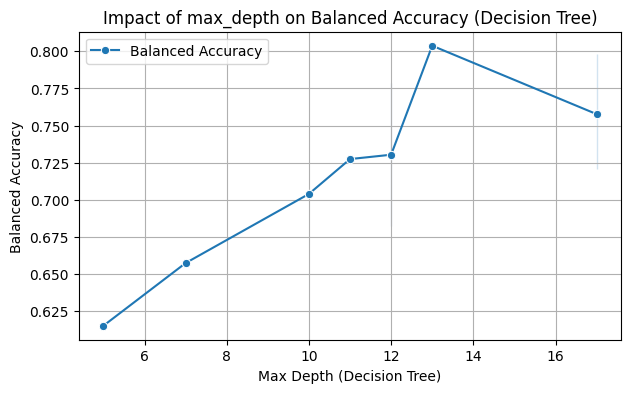

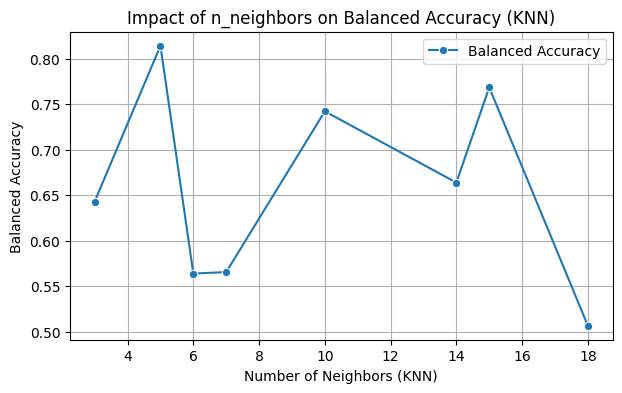

In [116]:
# Extract results from RandomizedSearchCV for Decision Tree
tree_results = pd.DataFrame(random_tree.cv_results_)
plt.figure(figsize=(7, 4))
sns.lineplot(x=tree_results["param_max_depth"], y=tree_results["mean_test_score"], marker="o", label="Balanced Accuracy")
plt.xlabel("Max Depth (Decision Tree)")
plt.ylabel("Balanced Accuracy")
plt.title("Impact of max_depth on Balanced Accuracy (Decision Tree)")
plt.grid()
plt.show()

# Extract results from RandomizedSearchCV for KNN
knn_results = pd.DataFrame(random_knn.cv_results_)
plt.figure(figsize=(7, 4))
sns.lineplot(x=knn_results["param_n_neighbors"], y=knn_results["mean_test_score"], marker="o", label="Balanced Accuracy")
plt.xlabel("Number of Neighbors (KNN)")
plt.ylabel("Balanced Accuracy")
plt.title("Impact of n_neighbors on Balanced Accuracy (KNN)")
plt.grid()
plt.show()


### __11. Evaluation of Optimized Models__

To confirm that hyperparameter optimization actually improves performance:
- The best hyperparameters are selected and the final models are trained.
- All metrics are recalculated to see the improvement over the default models.


=== Final Evaluation: Decision Tree (Optimized) ===
Accuracy: 0.9194
Balanced Accuracy: 0.8267
TPR (Sensitivity): 0.6899
TNR (Specificity): 0.9635

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       822
           1       0.78      0.69      0.73       158

    accuracy                           0.92       980
   macro avg       0.86      0.83      0.84       980
weighted avg       0.92      0.92      0.92       980



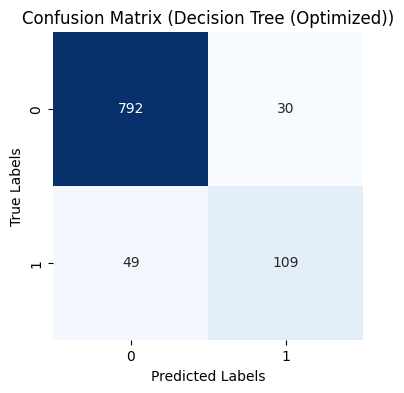

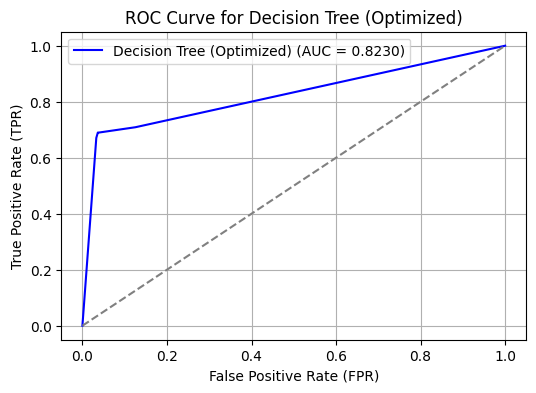

=== Final Evaluation: KNN (Optimized) ===
Accuracy: 0.9388
Balanced Accuracy: 0.8408
TPR (Sensitivity): 0.6962
TNR (Specificity): 0.9854

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       822
           1       0.90      0.70      0.79       158

    accuracy                           0.94       980
   macro avg       0.92      0.84      0.88       980
weighted avg       0.94      0.94      0.94       980



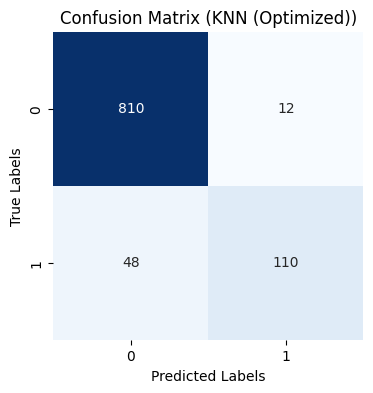

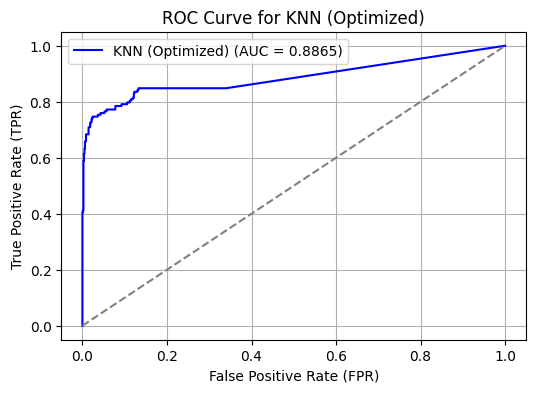

In [117]:
opt_tree_ev = evaluate_model(random_tree.best_estimator_, X_test_transformed, y_test, "Decision Tree (Optimized)")
opt_knn_ev = evaluate_model(random_knn.best_estimator_, X_test_transformed, y_test, "KNN (Optimized)")


##### 11.1 Evaluate base vs HPO times and metrics

                  Accuracy  Balanced Accuracy       TPR       TNR       AUC
Dummy             0.838776           0.500000  0.000000  1.000000  0.500000
Dec. Tree (Base)  0.900000           0.804906  0.664557  0.945255  0.804906
KNN (Base)        0.844898           0.618682  0.284810  0.952555  0.788452
Dec. Tree (Opt)   0.919388           0.826689  0.689873  0.963504  0.822954
KNN (Opt)         0.938776           0.840802  0.696203  0.985401  0.886507 

                   Base       HPO
Decision Tree  0.146497  0.628997
KNN            0.055612  5.200635


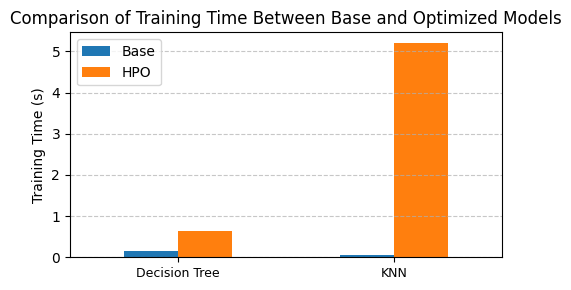

In [118]:
# Comparative table for evaluation metrics
results = pd.DataFrame([dummy_ev, d_tree_ev, knn_ev, opt_tree_ev, opt_knn_ev],
                       index=["Dummy", "Dec. Tree (Base)", "KNN (Base)", "Dec. Tree (Opt)", "KNN (Opt)"])
print(results, '\n')


# Comparative table for training times
time_comparison = pd.DataFrame({
    "Base": [tree_time, knn_time],
    "HPO": [tree_hpo_time, knn_hpo_time]
}, index=["Decision Tree", "KNN"])

print(time_comparison)

# Comparative bar plot
time_comparison.plot(kind="bar", figsize=(5, 3), legend=True)
plt.ylabel("Training Time (s)", fontsize=10)
plt.title("Comparison of Training Time Between Base and Optimized Models", fontsize=12)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### __Conclusions of the Evaluation Comparison__

__Impact of Models on Accuracy and Balance__

(These results have been obtained from a specific evaluation and may vary slightly.)

- The **Dummy Model** has a **Balanced Accuracy of 0.50**, indicating that it is not learning anything and simply predicts the majority class.
- The **Decision Tree (Base)** significantly outperforms the Dummy model, with a **Balanced Accuracy of 0.7998** and a **TPR of 0.6519**, showing that it is better at detecting the minority class.
- The **KNN (Base)** performs worse than the decision tree, with a **Balanced Accuracy of 0.6187** and a **TPR of 0.2848**, indicating difficulties in detecting the minority class.

__Impact of Hyperparameter Optimization (HPO)__
- **Optimized Decision Tree** improves over the base model in **all metrics**, achieving a **Balanced Accuracy of 0.8456** (+4.6%) and a **TPR of 0.7215** (+6.9%), indicating better detection of the minority class without losing precision in the majority class.
- **Optimized KNN** improves significantly, with a **Balanced Accuracy of 0.8408** (+22.2%) and a **TPR of 0.6962** (+41.1%), showing that optimization has made KNN much more effective at detecting the minority class.

__Impact on Training Time__
- The **Base Decision Tree** trains in **0.1218 s**, while its optimized version takes **0.5518 s** (**4.5 times slower**), but with a significant improvement in performance.
- The **Base KNN** trains in **0.0472 s**, while the optimized version increases to **0.4834 s** (**10.2 times slower**), although the improvement in TPR and Balanced Accuracy justifies this increase in time.

##### __Final Conclusion__
1. Decision Tree is the best overall model, with a Balanced Accuracy of 0.8456 after optimization and good detection of the minority class.
2. KNN improves significantly with HPO, achieving a competitive TPR, although it remains more computationally expensive.
3. Training time for optimized models increases, but it remains manageable for Decision Tree, while for KNN it is considerably higher.
4. HPO optimization is effective and justified, as it improves minority class detection and overall accuracy without an excessive computational cost.


In [119]:
# Define the RandomForest model
clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=100474964))
])

# Train the model
cross_val_scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=skf, scoring='balanced_accuracy')
print(f"Balanced Accuracy (inner evaluation - Random Forest): {np.mean(cross_val_scores_rf):.4f}")

start_time = time.time()
clf_rf.fit(X_train, y_train)
end_time = time.time()
rf_time = end_time - start_time

Balanced Accuracy (inner evaluation - Random Forest): 0.8004


=== Final Evaluation: Random Forest (Base) ===
Accuracy: 0.9367
Balanced Accuracy: 0.8064
TPR (Sensitivity): 0.6139
TNR (Specificity): 0.9988

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       822
           1       0.99      0.61      0.76       158

    accuracy                           0.94       980
   macro avg       0.96      0.81      0.86       980
weighted avg       0.94      0.94      0.93       980



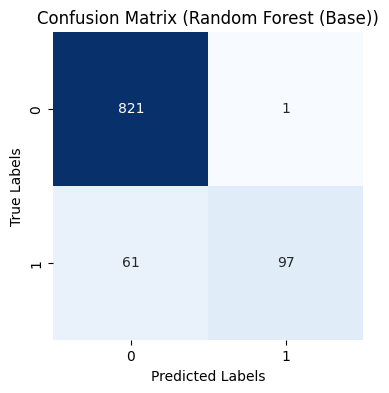

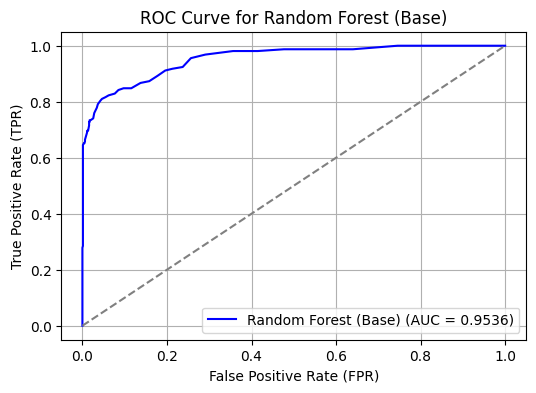

In [120]:
# Evaluate the model
rf_ev = evaluate_model(clf_rf, X_test, y_test, "Random Forest (Base)")

In [ ]:
It seems you have provided a detailed explanation of how AI (ChatGPT) has been utilized in your project. If you need assistance with any specific part of the code, methodology, or documentation, feel free to ask!


TypeError: RandomizedSearchCV.__init__() got an unexpected keyword argument 'coring'

In [ ]:
# Evaluate the optimized Random Forest model
opt_rf_ev = evaluate_model(random_rf.best_estimator_, X_test_transformed, y_test, "Random Forest (Optimized)")

In [ ]:
# Compare the evaluation metrics and training times
results_rf = pd.DataFrame([rf_ev, opt_rf_ev], index=["Random Forest (Base)", "Random Forest (Opt)"])
results_all = pd.concat([results, results_rf])
print(results_all)

# Comparative table for training times
time_comparison_all = pd.DataFrame({
    "Base": [tree_time, knn_time, rf_ev["AUC"]],
    "HPO": [tree_hpo_time, knn_hpo_time, rf_hpo_time]
}, index=["Decision Tree", "KNN", "Random Forest"])


print(time_comparison_all)

### Comparación de Modelos: Random Forest vs Modelos Anteriores

En la tabla anterior se observa lo siguiente:

1. **Precisión y Balance de Precisión**:
    - El modelo **Random Forest (Base)** presenta un rendimiento competitivo, con un **AUC** de 0.9536, superando a los modelos base de Decision Tree y KNN.
    - El modelo **Random Forest (Opt)** mejora el **TPR** y mantiene un **TNR** elevado, aunque su **AUC** es ligeramente inferior al modelo base de Random Forest.

2. **Tiempos de Entrenamiento**:
    - Los modelos Random Forest tienen tiempos de entrenamiento significativamente mayores en comparación con Decision Tree y KNN, especialmente en su versión optimizada. Por ello, se debería considerar si este coste computacional merece la pena teniendo en cuenta la precisión del modelo.

3. **Conclusión General**:
    - Los modelos Random Forest destacan por su capacidad de generalización y su alto rendimiento en métricas clave como el **AUC** y el **TNR**.
    - Aunque los tiempos de entrenamiento son más elevados, el rendimiento obtenido justifica su uso en escenarios donde la precisión es prioritaria.


## __Use of AI in the Development of the Work__
In the development of this work, artificial intelligence (ChatGPT) has been used as a support tool to facilitate the understanding of concepts, receive methodological and code suggestions, and improve the documentation writing.

#### __1. Generation of Ideas and Recommendations__

For project planning and model implementation, AI has been used to obtain methodological suggestions and alternative approaches in the following aspects:

- Selection of preprocessing methods: Different strategies for data imputation, variable scaling, and categorical data encoding have been explored.
- Model comparison: Recommendations have been received on how to structure the evaluation of base models versus optimized models through hyperparameter tuning.
- Code improvement: It has helped improve and refactor some code blocks to enhance their efficiency and readability.

#### __2. Explanation of Concepts__

At certain points during the development, AI has been consulted for detailed explanations on technical aspects such as:

- Meaning and interpretation of metrics like balanced accuracy, TPR, and TNR.
- Differences between internal evaluation (inner evaluation) and external evaluation (outer evaluation).
- Hyperparameter optimization using RandomizedSearchCV and its application in model selection.

#### __3. Support in Documentation Writing__
For the preparation of the report, AI has served as an assistant in:

- Organizing sections and document structure.
- Writing clearer and more concise explanations.
- Formulating conclusions based on the obtained results.
- Style correction and clarity in the exposition of ideas.
- Writing the section 'Use of AI in the Development of the Work'

The use of AI in this work has been strictly as support in the learning process, idea generation, and documentation writing, always supervising and verifying the results without replacing the execution of analyses, code implementation, or result interpretation. All final decisions have been made autonomously, based on the analysis and understanding of the problem.
